In [1]:
import numpy as np
import scipy.stats as stats
from scipy.special import digamma
import matplotlib.pyplot as plt

In [2]:
def fit(data, n_steps):
    """MLE Fit dirichlet multinomial distribution to multinomial observation data
    using the fixed point iteration of "Estimating a Dirichlet distribution" Minka 
    Equation (55)

    
    Inputs
    ------
    data - 2d nd.array. Axis 0 - observations, axis 1 - multinimial outcomes
    n_steps - int
    
    Returns
    -------
        alpha_vs_iter - list of alpha estimates vs iteration
    
    
    To improve: better initialization using method of moments
    """
    
    def update(alpha_old, data):

        alpha_new = alpha_old * \
                     (digamma(data + alpha_old[None,:]) - digamma(alpha_old)).sum(axis =0)/( \
                      (digamma(data.sum(axis = 1) + alpha_old.sum())- digamma( alpha_old.sum()))).sum()

        return alpha_new
    
    
    col_sums = data.sum(axis = 0)
    
    alpha = np.ones(data.shape[1])
    
    i = 0
    alpha_vs_iter= [alpha]
    while i < n_steps:
        alpha = update(alpha, data)
        alpha_vs_iter.append(alpha)
        i+=1
    return alpha_vs_iter

In [3]:
#####################################
## Generate some dummy data  ########
#####################################

n_sides = 20
n_obsv = 500
alpha_true = 5*np.random.ranf(size = n_sides)

trials_per_obsv = np.random.choice(list(range(1,16,1)),
                                   p = np.array(list(range(1,16,1)))/ ((15 +1)*(15)/2),
                                  size = n_obsv
                                  )
obsv_array =  np.array( [ stats.multinomial.rvs(n = trial_obsv,
                                                      p = stats.dirichlet.rvs(alpha = alpha_true).squeeze()
                                                     ) 
                        for trial_obsv in trials_per_obsv  ]
                            
                       )

In [4]:
obsv_array.sum(axis = 0)

array([241, 359, 434, 484, 253, 421,  52, 148, 123, 275, 149,  61, 530,
       475,  14, 347,  91, 332,   1, 475])

In [5]:
###########################
######### FIT.       ######
###########################
result = fit(data = obsv_array , n_steps = 200)

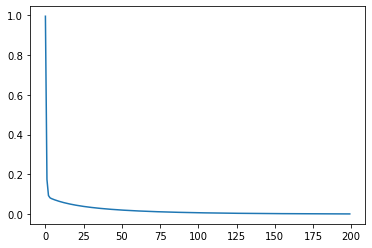

In [6]:
###########################
### Convergence      ######
###########################\
plt.plot( list(range(len(result)-1)),
          [max(np.abs(cur - prev)) for cur, prev in zip(result[1:], result[0:-1]) ]
        )


[1.95166252 3.2301797  3.95298624 4.27527158 2.4066774  3.4754897
 0.53638904 1.469929   0.92437378 2.47348508 1.32244468 0.56797216
 4.41016114 4.22297962 0.18012036 3.21453972 0.8357405  2.86007381
 0.00570323 4.18630165]
[2.25813905 3.44008423 4.13679176 4.56925269 2.44825651 4.01396938
 0.51029067 1.38749763 1.18607759 2.63096868 1.43636105 0.58646152
 5.07802399 4.5029316  0.13751431 3.29458664 0.82641065 3.13910771
 0.01048058 4.49247887]


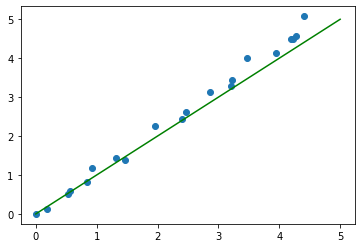

In [15]:
#######################################################
### Print true alpha and final estimates      ######
######################################################
print(alpha_true)
print(result[-1])
plt.scatter(alpha_true, result[-1])
plt.plot([0,5], [0,5], color = 'g')